In [65]:
import env
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

from pydataset import data

In [66]:
from env import host, user, password
def get_db_url(db, env_file=os.path.exists('env.py')):
    '''
    Accepts the string of which schema you want to connect to, grabs user, password, and host
    from your env.py file.
    This function is so you aren't posting your login credientials.
    Please make sure your env file is ALWAYS in your gitignore.
    '''
    if env_file:
        user, password, host = (env.user, env.password, env.host)
        return f'mysql+pymysql://{user}:{password}@{host}/{db}'
    else:
        return 'Please ensure you have proper credentials in your env.py, and check the spelling of the database.'

In [67]:
url = get_db_url("iris_db")
sql1 = '''
SELECT * FROM measurements
'''
sql2 = '''
SELECT * FROM species
'''

measurements = pd.read_sql(sql1,url)
species = pd.read_sql(sql2,url)

In [68]:
species
measurements
iris = measurements.merge(species, on="species_id")
iris.shape

(150, 7)

In [69]:
iris.head()

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id,species_name
0,1,5.1,3.5,1.4,0.2,1,setosa
1,2,4.9,3.0,1.4,0.2,1,setosa
2,3,4.7,3.2,1.3,0.2,1,setosa
3,4,4.6,3.1,1.5,0.2,1,setosa
4,5,5.0,3.6,1.4,0.2,1,setosa


What does the distribution of petal lengths look like?


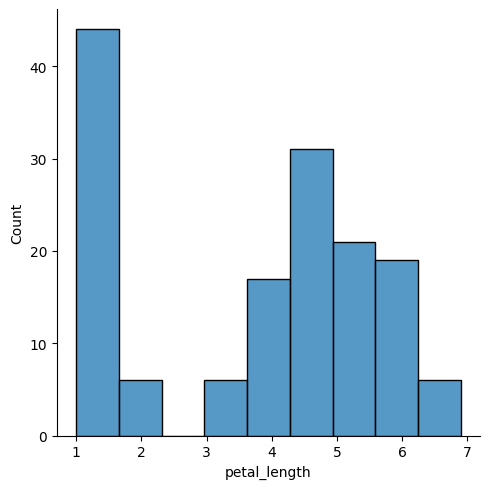

In [70]:
sns.displot(iris.petal_length)

Is there a correlation between petal length and petal width? Use http://guessthecorrelation.com/ as a hint to how we could visually determine if a correlation exists between two numeric columns.


/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


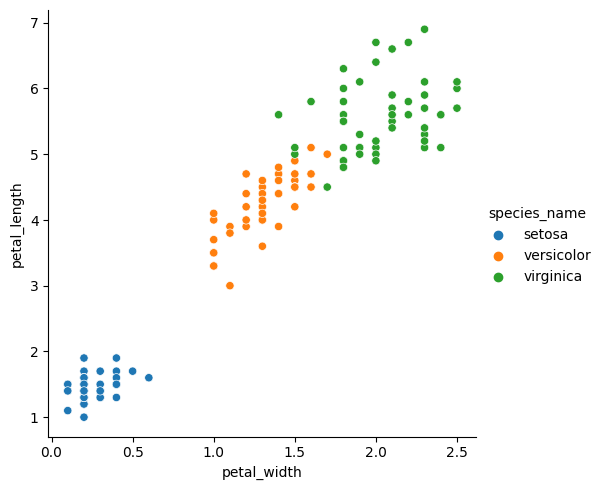

In [71]:
sns.relplot(iris.petal_width,iris.petal_length, hue=iris.species_name)
# I love that this came out in iris colours. Except... running it with species_name instead of species_id kills the colours. Sad day.

Would it be reasonable to predict species based on sepal width and sepal length? For this, you'll visualize two numeric columns through the lense of a categorical column.


/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


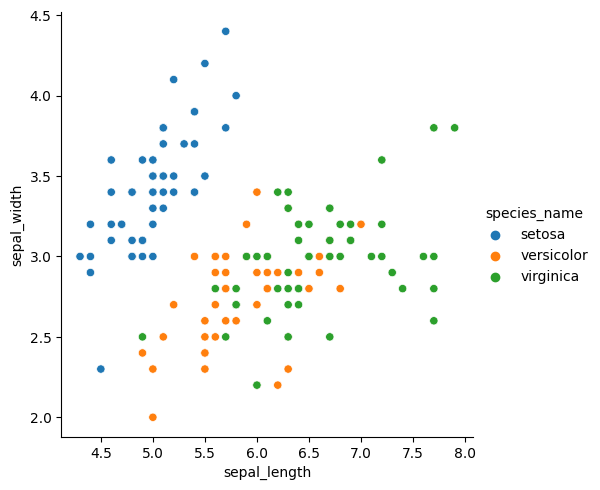

In [72]:
sns.relplot(iris.sepal_length,iris.sepal_width,hue=iris.species_name)

Which features would be best used to predict species?

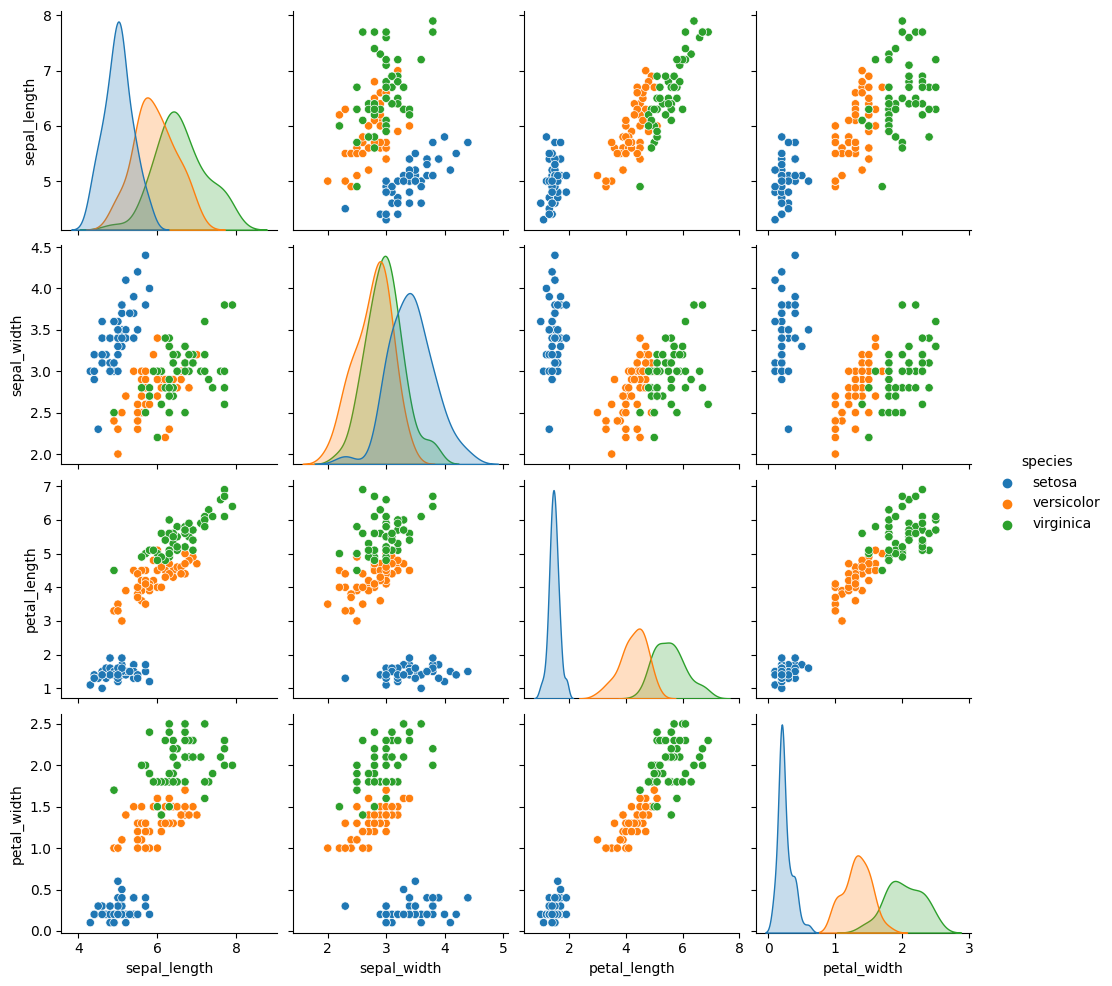

In [73]:
# sns.pairplot(data = iris, hue='species_name')
# ^ That makes a few too many pointless comparisons. let's clean it??
iris = measurements.merge(species, on="species_id").drop(columns={'species_id',
                                                                    'measurement_id'}).rename(columns={'species_name' : 'species'})
sns.pairplot(data= iris, hue= 'species')

# using sepal length or width in tandum with petal length or width would be the best items to predict using.

Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?

Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

In [74]:
anscombe = sns.load_dataset('anscombe')
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [75]:
anscombe.groupby('dataset').describe()
# Notice that the relative data for each category being summarised 
# is fairly close to each other for the most part.

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

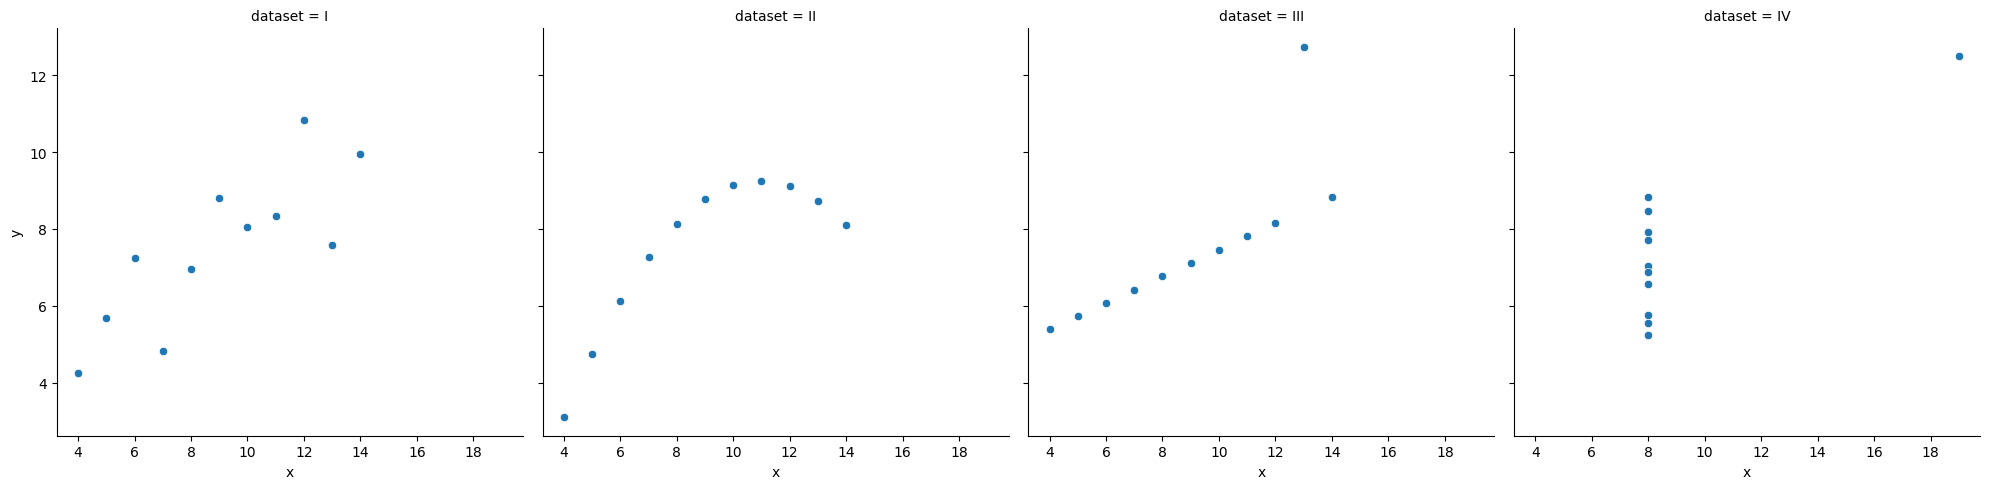

In [76]:
sns.relplot(data= anscombe, x = 'x', y = 'y', col='dataset')
# The data is very much NOT like each other unlike the general summary.

Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.

In [77]:
bug_spray = data('InsectSprays')
data('InsectSprays', show_doc=True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

In [78]:
bug_spray.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 1 to 72
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   count   72 non-null     int64 
 1   spray   72 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


Text(0.5, 1.0, 'Effectiveness of Insect Sprays')

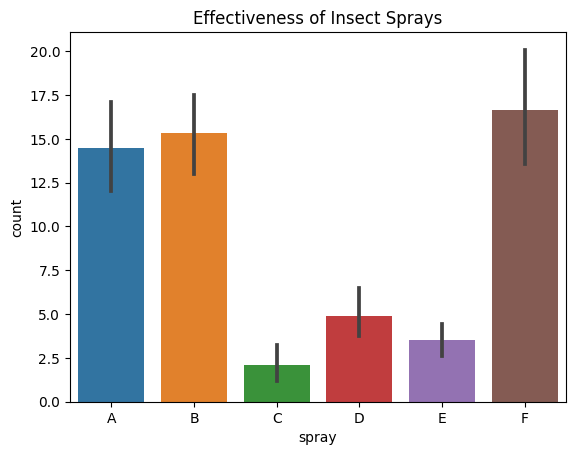

In [79]:
sns.barplot(data = bug_spray, y = 'count', x = 'spray')
plt.title('Effectiveness of Insect Sprays')

Text(0.5, 1.0, 'Effectiveness of insect sprays')

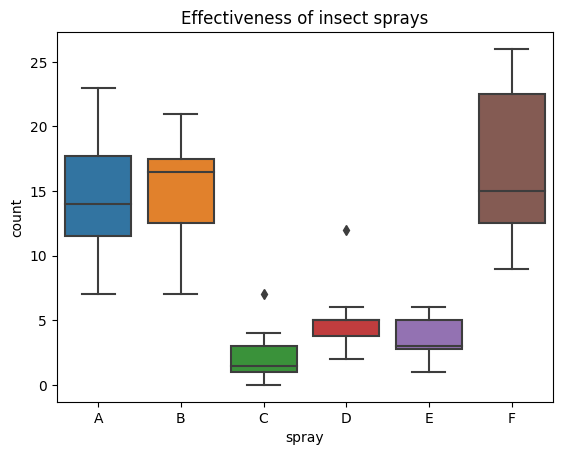

In [80]:
sns.boxplot(data= bug_spray, y = 'count', x= 'spray')
plt.title('Effectiveness of insect sprays')

Load the swiss dataset and read it's documentation. The swiss dataset is available from pydatset rather than seaborn. Create visualizations to answer the following questions:



In [81]:
swiss = data('swiss')
data('swiss', show_doc=True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [82]:
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)


In [83]:
swiss['is_catholic'] = swiss.Catholic >= 51

In [84]:
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False


Does whether or not a province is Catholic influence fertility?


<AxesSubplot:xlabel='is_catholic', ylabel='Fertility'>

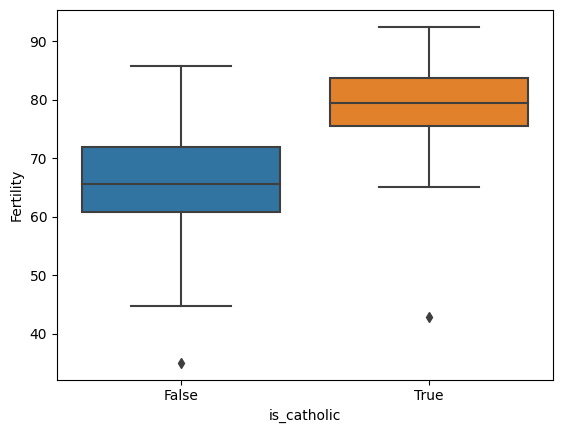

In [85]:
# sns.barplot(data = swiss, x = 'is_catholic', y = 'Fertility') <-- Shows fairly close, so a range would be better.
sns.boxplot(data = swiss, x = 'is_catholic', y = 'Fertility')

What measure correlates most strongly with fertility?

In [92]:
swiss = swiss.drop(columns='is_catholic')
# I think it keeps getting upset about boolean.

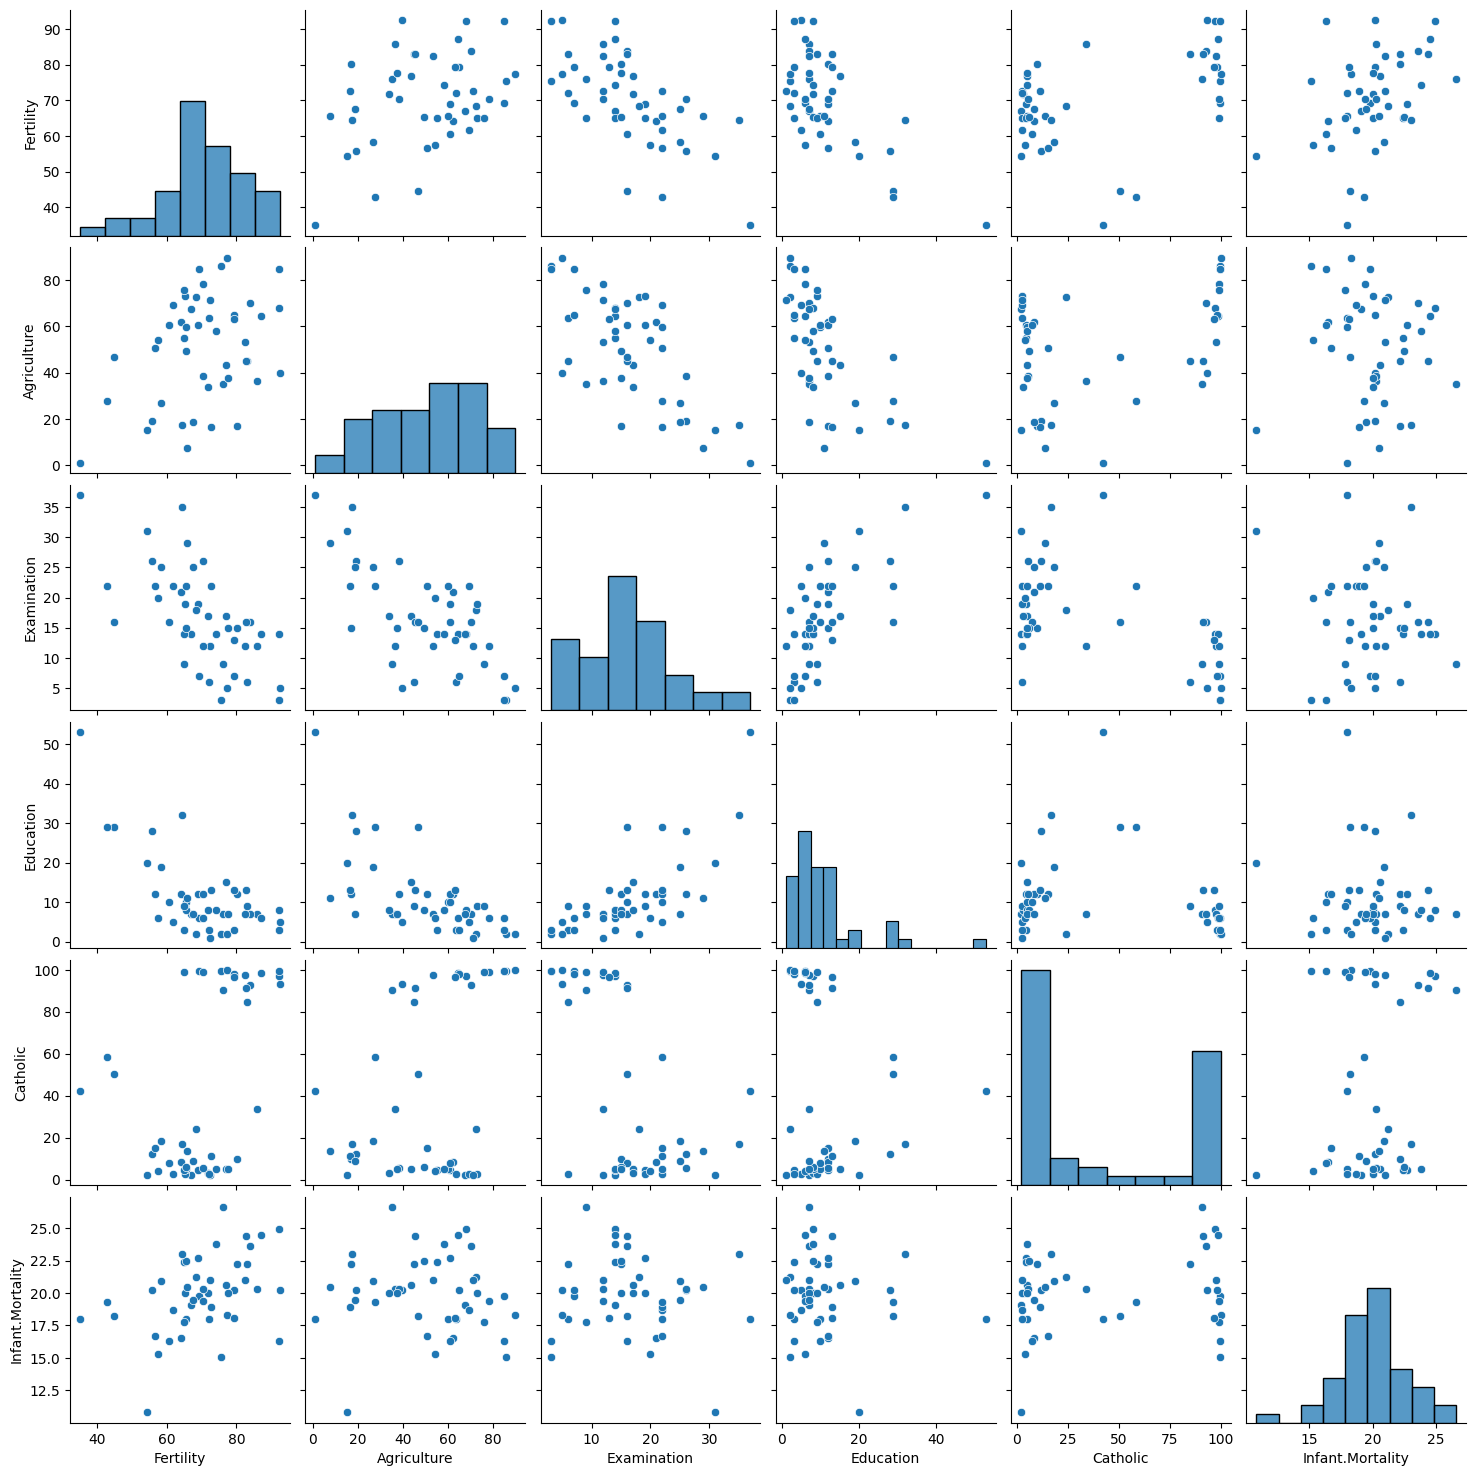

In [93]:
sns.pairplot(swiss)
# I feel like Educagion had the biggest correclation with fertility of the options, 
# it looks like... the more educated the less fertile?

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='Fertility'>

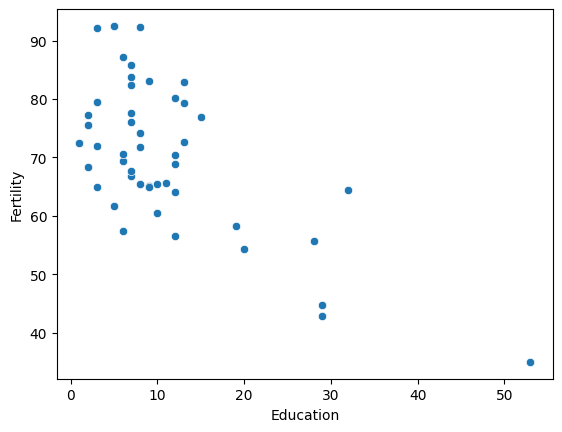

In [95]:
sns.scatterplot(swiss.Education, swiss.Fertility)

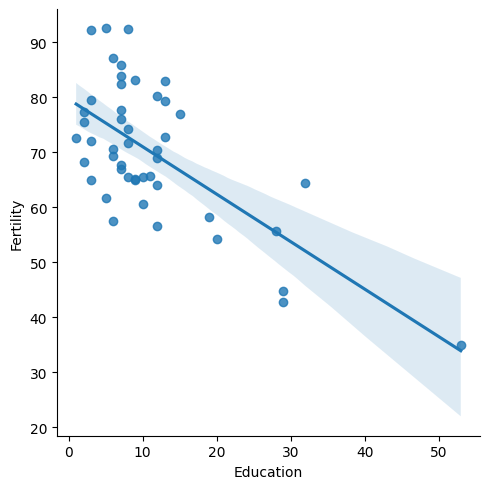

In [97]:
sns.lmplot(data = swiss, x ='Education',y = 'Fertility')

Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [ ]:
# URL Function without all the checks, very nice.
# def get_db_url(db):
#     from env import user, password, host
#    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [98]:
url = get_db_url('chipotle')
sql = "SELECT * FROM orders"
orders = pd.read_sql(sql, url)
orders.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [99]:
# Need to fix Price, just like before.
orders['item_price'] = orders.item_price.str.replace('$', '').astype('float')

/var/folders/q3/1b2t5ssx44b5gc0gsnqnd4ww0000gn/T/ipykernel_9008/2126619541.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  orders['item_price'] = orders.item_price.str.replace('$', '').astype('float')


In [100]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  4622 non-null   int64  
 1   order_id            4622 non-null   int64  
 2   quantity            4622 non-null   int64  
 3   item_name           4622 non-null   object 
 4   choice_description  4622 non-null   object 
 5   item_price          4622 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 216.8+ KB


In [101]:

best_sellers = orders.groupby('item_name').quantity.sum().nlargest(4)

In [102]:
best_sellers.index
# very handy for combinding

Index(['Chicken Bowl', 'Chicken Burrito', 'Chips and Guacamole',
       'Steak Burrito'],
      dtype='object', name='item_name')

In [103]:
revenue = orders[orders.item_name.isin(best_sellers.index)].groupby('item_name').item_price.sum()

In [104]:
best_sellers.reset_index().merge(orders.groupby('item_name').item_price.sum().reset_index(), on='item_name')

,item_name,quantity,item_price
0,Chicken Bowl,761,7342.73
1,Chicken Burrito,591,5575.82
2,Chips and Guacamole,506,2201.04
3,Steak Burrito,386,3851.43


In [105]:
revenue = revenue.sort_values(ascending = False).reset_index()

Text(0.5, 0, 'Revenue (in $)')

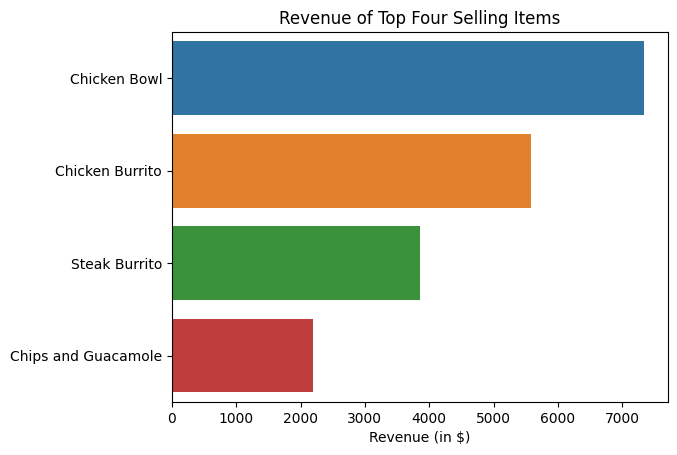

In [108]:
sns.barplot(data = revenue, y = 'item_name', x = 'item_price')
plt.title('Revenue of Top Four Selling Items')
plt.ylabel("")
plt.xlabel("Revenue (in $)")

Load the sleepstudy data and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [110]:
sleepstudy = data('sleepstudy')
sleepstudy.info()
# Madeleine changed the data for better readability!
sleepstudy['Subject'] = 'Subject_' + sleepstudy.Subject.astype(str) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1 to 180
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reaction  180 non-null    float64
 1   Days      180 non-null    int64  
 2   Subject   180 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 5.6 KB


Text(0, 270, 'Average reaction')

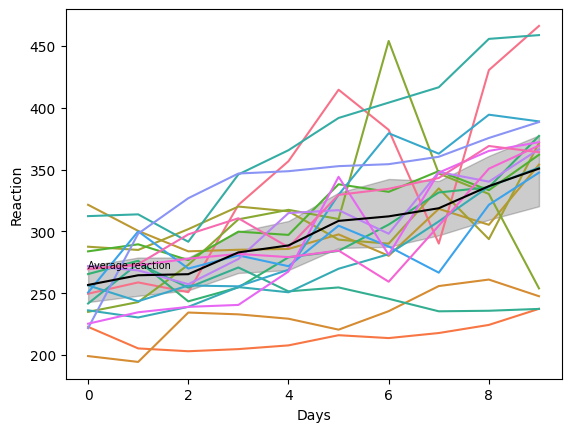

In [120]:
sns.lineplot(data = sleepstudy, x = 'Days', y = 'Reaction', hue = 'Subject', legend=False)
sns.lineplot(data = sleepstudy, x = 'Days', y = 'Reaction', color = 'black', linestyle='solid', estimator = 'mean')
plt.annotate('Average reaction',(-0,270),fontsize=7)